In [1]:
import warnings
warnings.filterwarnings('ignore')

TARGET = 'mpg'
DISCOVERY_TIMEOUT_SECONDS=1800
ESTIMATION_TIMEOUT_SECONDS=1800
REFUTATION_GLOBAL_TIMEOUT_SECONDS=1800
REFUTATION_MODEL_TIMEOUT_SECONDS=240

# Dataset and Knowledge settings

In [2]:
import pandas as pd

df = pd.read_csv('./resources/auto_mpg/data.csv')
df['origin'] = df['origin'].astype(float)
df['cylinders'] = df['cylinders'].astype(float)
df['horsepower'] = df['horsepower'].astype(float)
df['modelyear'] = df['modelyear'].astype(float)
df['weight'] = df['weight'].astype(float)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
387,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
388,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
389,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
390,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [3]:
display(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    float64
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-null    float64
 6   modelyear     392 non-null    float64
 7   origin        392 non-null    float64
dtypes: float64(8)
memory usage: 24.6 KB


None

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [4]:
from causal_nest.knowledge import parse_knowledge_file

knowledge = parse_knowledge_file('./resources/auto_mpg/knowledge.txt')
knowledge

Knowledge(required_edges=[], forbidden_edges=[('horsepower', 'origin'), ('mpg', 'horsepower'), ('acceleration', 'weight'), ('mpg', 'weight'), ('horsepower', 'displacement'), ('acceleration', 'horsepower'), ('mpg', 'modelyear'), ('displacement', 'weight'), ('horsepower', 'cylinders'), ('acceleration', 'modelyear'), ('displacement', 'modelyear'), ('cylinders', 'weight'), ('cylinders', 'modelyear'), ('horsepower', 'weight'), ('acceleration', 'origin'), ('mpg', 'origin'), ('horsepower', 'modelyear'), ('displacement', 'origin'), ('acceleration', 'displacement'), ('mpg', 'displacement'), ('mpg', 'cylinders'), ('cylinders', 'origin'), ('acceleration', 'cylinders'), ('displacement', 'cylinders')])

In [5]:
from causal_nest.dataset import MissingDataHandlingMethod, Dataset, handle_missing_data, FeatureTypeMap, FeatureType, estimate_feature_importances

feature_mapping = [FeatureTypeMap(feature=c, type=FeatureType.CONTINUOUS) for c in df.drop(TARGET, axis=1).columns]

dataset = Dataset(data=df, target=TARGET, feature_mapping=feature_mapping)
dataset = handle_missing_data(dataset, MissingDataHandlingMethod.FORWARD_FILL)
dataset = estimate_feature_importances(dataset)
dataset

Dataset(data=      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0        4.0         140.0        86.0  2790.0          15.6   
388  44.0        4.0          97.0        52.0  2130.0          24.6   
389  32.0        4.0         135.0        84.0  2295.0          11.6   
390  28.0        4.0         120.0        79.0  2625.0          18.6   
391  31.0        4.0         119.0        82.0  2720.0          19.4   

     modelyear  origin  
0         70.0     1.0  
1         70.0     1.0  
2         70.0     1.0  
3         70.0     1.0

In [6]:
from causal_nest.problem import Problem

problem = Problem(dataset=dataset, description='Airfoil Self Noise', knowledge=knowledge)
problem

Problem(dataset=Dataset(data=      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0        8.0         307.0       130.0  3504.0          12.0   
1    15.0        8.0         350.0       165.0  3693.0          11.5   
2    18.0        8.0         318.0       150.0  3436.0          11.0   
3    16.0        8.0         304.0       150.0  3433.0          12.0   
4    17.0        8.0         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
387  27.0        4.0         140.0        86.0  2790.0          15.6   
388  44.0        4.0          97.0        52.0  2130.0          24.6   
389  32.0        4.0         135.0        84.0  2295.0          11.6   
390  28.0        4.0         120.0        79.0  2625.0          18.6   
391  31.0        4.0         119.0        82.0  2720.0          19.4   

     modelyear  origin  
0         70.0     1.0  
1         70.0     1.0  
2         70.0     1.0  
3     

## Checking the Feature infered importance

In [7]:
problem.dataset.feature_mapping

[FeatureTypeMap(feature='displacement', type=<FeatureType.CONTINUOUS: 3>, importance=0.27649531363230667),
 FeatureTypeMap(feature='cylinders', type=<FeatureType.CONTINUOUS: 3>, importance=0.2330816278299192),
 FeatureTypeMap(feature='weight', type=<FeatureType.CONTINUOUS: 3>, importance=0.21351573411979008),
 FeatureTypeMap(feature='modelyear', type=<FeatureType.CONTINUOUS: 3>, importance=0.12564981183023158),
 FeatureTypeMap(feature='horsepower', type=<FeatureType.CONTINUOUS: 3>, importance=0.11489452996539934),
 FeatureTypeMap(feature='acceleration', type=<FeatureType.CONTINUOUS: 3>, importance=0.029209532677335708),
 FeatureTypeMap(feature='origin', type=<FeatureType.CONTINUOUS: 3>, importance=0.007153449945017287)]

# Causal Discovery

In [8]:
from causal_nest.discovery import applyable_models

models = applyable_models(problem)
models

[causal_nest.discovery_models.pc.PC,
 causal_nest.discovery_models.gs.GS,
 causal_nest.discovery_models.ccdr.CCDR,
 causal_nest.discovery_models.iamb.IAMB,
 causal_nest.discovery_models.sam.SAM,
 causal_nest.discovery_models.bes.BES,
 causal_nest.discovery_models.grasp.GRASP,
 causal_nest.discovery_models.cgnn.CGNN]

In [9]:
from causal_nest.discovery import discover_with_all_models

problem = discover_with_all_models(problem, max_seconds_model=DISCOVERY_TIMEOUT_SECONDS)
problem.discovery_results

  0%|          | 0/1000 [00:00<?, ?it/s]

GRaSP edge count: 12    
GRaSP completed in: 0.34s 


 54%|█████▍    | 538/1000 [04:26<02:41,  2.86it/s, disc=-.878, gen=-.288, regul_loss=0.332, tot=-6.23] 

{'PC': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada58640>, model='PC', auc_pr=None, shd=None, sid=None, runtime=7.735817548993509, priority_score=0.3826530612244898, knowledge_integrity_score=0.875, forbidden_edges_violation_rate=0.125, required_edges_compliance_rate=1.0),
 'GS': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada583d0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=1.8262713269941742, priority_score=0.537109375, knowledge_integrity_score=0.7916666666666666, forbidden_edges_violation_rate=0.20833333333333334, required_edges_compliance_rate=1.0),
 'CCDR': DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada58580>, model='CCDR', auc_pr=None, shd=None, sid=None, runtime=2.9041824890009593, priority_score=0.2678571428571429, knowledge_integrity_score=0.5833333333333333, forbidden_edges_violation_rate=0.4166666666666667, required_edges_compliance_rate=1.0),
 'IAMB': Non

In [10]:
list(sorted(filter(lambda x: x, problem.discovery_results.values()), key=lambda x: x.priority_score, reverse=True))

[DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada58070>, model='BES', auc_pr=None, shd=None, sid=None, runtime=0.5914712649973808, priority_score=0.8928571428571427, knowledge_integrity_score=0.5833333333333333, forbidden_edges_violation_rate=0.4166666666666667, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada583d0>, model='GS', auc_pr=None, shd=None, sid=None, runtime=1.8262713269941742, priority_score=0.537109375, knowledge_integrity_score=0.7916666666666666, forbidden_edges_violation_rate=0.20833333333333334, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<networkx.classes.digraph.DiGraph object at 0x7fffada58640>, model='PC', auc_pr=None, shd=None, sid=None, runtime=7.735817548993509, priority_score=0.3826530612244898, knowledge_integrity_score=0.875, forbidden_edges_violation_rate=0.125, required_edges_compliance_rate=1.0),
 DiscoveryResult(output_graph=<ne

# Causal Estimation

In [11]:
from causal_nest.estimation import estimate_all_effects

problem = estimate_all_effects(problem, verbose=True, max_seconds_model=ESTIMATION_TIMEOUT_SECONDS)
problem.estimation_results

{'BES': [EstimationResult(model='BES', treatment='displacement', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13756e50>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1376ec10>, control_value=0, treatment_value=1, p_value=array([1.66064183e-90])),
  EstimationResult(model='BES', treatment='cylinders', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff1371b760>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff1371bdc0>, control_value=0, treatment_value=1, p_value=array([0.19430199])),
  EstimationResult(model='BES', treatment='weight', estimand=<dowhy.causal_identifier.identified_estimand.IdentifiedEstimand object at 0x7fff13727640>, estimate=<dowhy.causal_estimator.CausalEstimate object at 0x7fff13727970>, control_value=0, treatment_value=1, p_value=array([8.36162444e-107])),
  EstimationResult(model='BES', treatment='modelyear', estimand=<dowhy.causal_identifier.identif

In [12]:
for m, er in problem.estimation_results.items():
    print('\n\n\nModel: ', m)
    for r in er:
        print(r.treatment, ': ', r.estimate.value)




Model:  BES
displacement :  -0.06005142781220485
cylinders :  -0.5763477185811396
weight :  -0.006632075291840067
modelyear :  0.6962122587522863
horsepower :  -0.03078627824347535
acceleration :  -0.4581231038215492
origin :  0



Model:  GS
displacement :  -0.026678898322529676
cylinders :  0
weight :  -0.005817402342373157
modelyear :  0.7243023052489228
horsepower :  -0.10513959150160446
acceleration :  -0.43106903117922357
origin :  0.4228250695274802



Model:  PC
displacement :  -0.04508724237715711
cylinders :  0
weight :  -0.005817402342373157
modelyear :  0.7199204929632685
horsepower :  -0.10513959150160446
acceleration :  0
origin :  0.4228250695274802



Model:  CCDR
displacement :  -0.06005142781220485
cylinders :  0
weight :  0
modelyear :  0
horsepower :  0
acceleration :  0
origin :  1.096536774783349


# Refutation

In [13]:
from causal_nest.refutation import refute_all_results

problem = refute_all_results(problem, max_seconds_global=REFUTATION_GLOBAL_TIMEOUT_SECONDS, max_seconds_model=REFUTATION_MODEL_TIMEOUT_SECONDS)
problem.refutation_results

e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable
e: 'NoneType' object is not subscriptable


{'BES': [RefutationResult(treatment='modelyear', estimated_effect=0.6962122587522863, p_value=0.98, new_effect=-0.0006480053511358541, model='PlaceboPermute', runtime=13.309877563006012, passed=True),
  RefutationResult(treatment='modelyear', estimated_effect=0.6962122587522863, p_value=0.94, new_effect=0.6956993074502753, model='RandomCommonCause', runtime=12.784483821000322, passed=True),
  RefutationResult(treatment='modelyear', estimated_effect=0.6962122587522863, p_value=0.96, new_effect=0.6953970199677232, model='SubsetRemoval', runtime=19.351473714996246, passed=True),
  RefutationResult(treatment='weight', estimated_effect=-0.006632075291840067, p_value=0.8999999999999999, new_effect=2.5692487027768606e-05, model='PlaceboPermute', runtime=13.319387529001688, passed=True),
  RefutationResult(treatment='weight', estimated_effect=-0.006632075291840067, p_value=0.88, new_effect=-0.006632310862542212, model='RandomCommonCause', runtime=11.83800112499739, passed=True),
  RefutationRe

# Output Graphs

In [14]:
from causal_nest.result import generate_all_results


graphs = generate_all_results(problem)
graphs

{'PC': 'digraph G {\nfontname="Helvetica,Arial,sans-serif";\nnode[style="filled", fontsize=20, penwidth=2.5, fixedsize=true, fontcolor="black", fillcolor="gray", color="black", shape="circle"];\nedge[penwidth=2, minlen=2];\nsplines="polyline";\n   "displacement"[width=1, height=1, label="displacement\n-0.05", fillcolor="lightpink"];\n   "cylinders"[width=1, height=1, label="cylinders\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "weight"[width=1, height=1, label="weight\n-0.01", fillcolor="lightpink"];\n   "modelyear"[width=1, height=1, label="modelyear\n0.72", fillcolor="#4CAF50", fontcolor="white"];\n   "horsepower"[width=1, height=1, label="horsepower\n-0.11", fillcolor="lightpink"];\n   "acceleration"[width=1, height=1, label="acceleration\n0.00", fillcolor="gray;0.25:lightgray;0.25:gray;0.25:lightgray;0.25", color="lightgray", style="wedged", shape="doublecircle"];\n   "origin"[width=1, height=1

PC


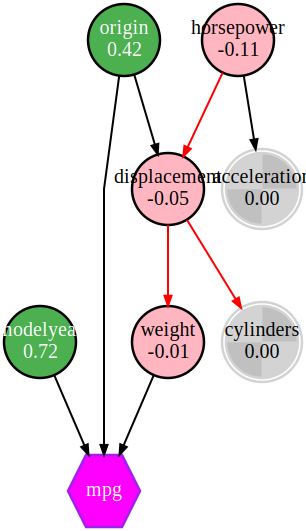

GS


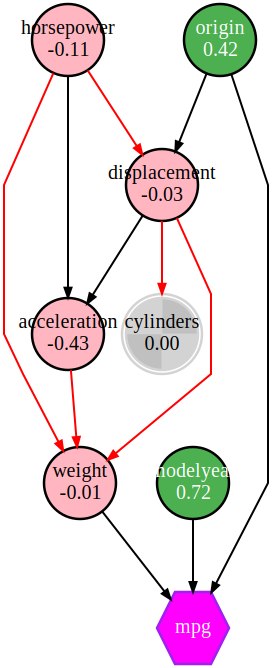

CCDR


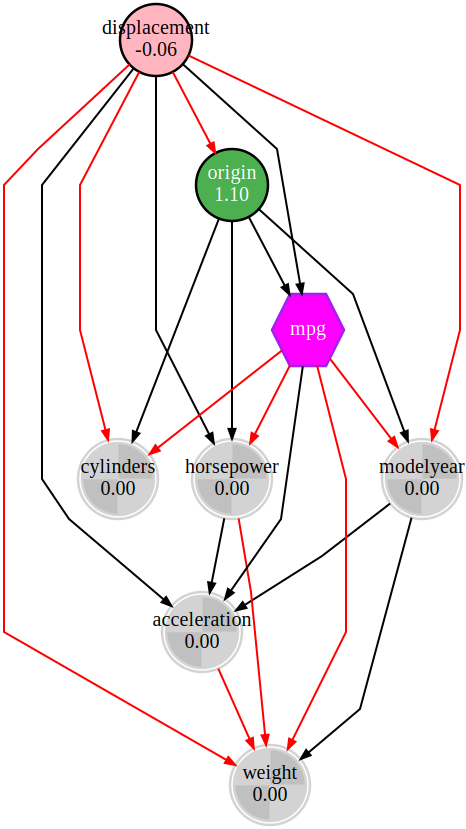

IAMB
No graph
SAM
No graph
BES


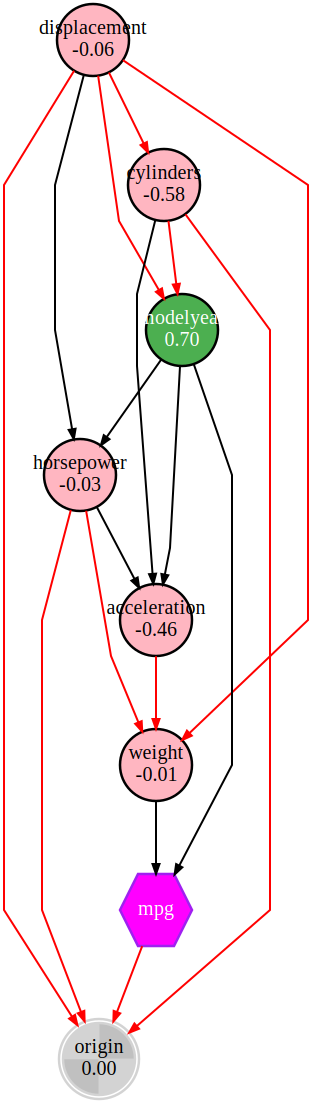

GRASP
No graph
CGNN
No graph


In [15]:
from graphviz import Source

for k, v in graphs.items():
    print(k)

    if v is None: 
        print('No graph')
    else:
        display(Source(v))